In [ ]:
# 알고리즘 : K-Nearest Neighbor (K -최근접 이웃)
### 미션 : 와인 데이터셋을 분석해 와인 등급을 예측하고 작동 원리를 이해
### 종속 변수 : class (범주형)
### 평가 지표 : 정확도
### 문제 유형 : 분류


지도학습 알고리즘 3
KNN모델로 - 종속변수가 범주형이며 개수가 3개이상인 다중분류 다룬다
학습 순서
1. 문제정의 -> 2. 라이브러리 및 데이터 불러오기 -> 3. 데이터 확인하기 -> 4. 목푯값에서 고윳값 확인하기 -> 5. 전처리: 결측치 처리하기 -> 6. 스케일링 -> 7.데이터 모델링 및 예측/평가하기 -> 8. 하이퍼파라미터 튜닝하기 9. 이해하기 

정의 : 거리 기반 모델. 선형관계 전제인 선형회귀나 로지스틱 회귀와 다름. 가까이 있는 데이터를 고려하여 예측값이 결정. 다중분류 문제에서 가장 편하 적용. 

장점 : 매우 직관적, 선형 모델과 다르게 별도의 가정이 없음. 
단점 : 데이터가 클 수록 상당히 늦어짐. 아웃라이어에 취약함 
*아웃라이어란 : 평균치에서 크게 벗어나는 데이터를 의미. 이상치. 
유용한 곳 : 분류 classification에서 사용되며, 로지스틱 회귀로 해결할 수 없는 3 개 이상의 목표 변수들도 분류가 가능함. 작은 데이터셋에 적합

6.2 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

6.3 데이터 확인하기

In [2]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [5]:
print(len(data.columns))

14


- 'alcohol' : 알코올 (도수))
- 'malic_acid' : 일산(사과산)
- 'ash' : 증발/소각후 남은 무기물
- 'alcalinity_of_ash' : 남은 무기물의 알칼리성
- 'magnesium' : 마그네슘
- 'total_phenols' : 전체 페놀
- 'flavanoids' : 플라보노이드(색소)
- 'nonflavanoid_phenols' : 비색소 페놀
- 'proanthocyanins' : 프로안토시아닌
- 'color_intensity' : 색상 강도
- 'hue' : 색조
- 'od280/od315_of_diluted_wines' : 희석된 와인의 단백질 함량 
- 'proline' : 프롤린
- 'class' : 와인 등급

12개의 독립변수

In [6]:
data.info()
# null 값 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [7]:
data.describe()
#alcohol 컬럼, nonflavanoid_phenols 컬럼 값 부족

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


1. 스케일 문제
- 피쳐마다 스케일이 다 다르다. 몇몇은 소숫점 값이고 몇몇은 백의 자리이다
- KNN에서 문제가 될수 있으니 이것을 스케일링 할 예정

2. 아웃라이어
- 75%와 Max값이 유독 차이가 두드러진 경우 

6.4 목푯값에서 고윳값 확인하기
- 목표값의 특성에 따라, 즉 연속성인지, 이진 변수인지, 3개이상으로 된 범주형 변수인지에 따라 적합한 알고리즘 선택.

In [11]:
data["class"].nunique()
# 목표 변수의 고윳값 출력

3

In [12]:
#많은 순서대로 리스트업
data["class"].unique()
# 고윳값 가짓수 출력

array([0, 1, 2])

In [14]:
#고윳값이 몇개 씩 있는지
data['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

<AxesSubplot: ylabel='class'>

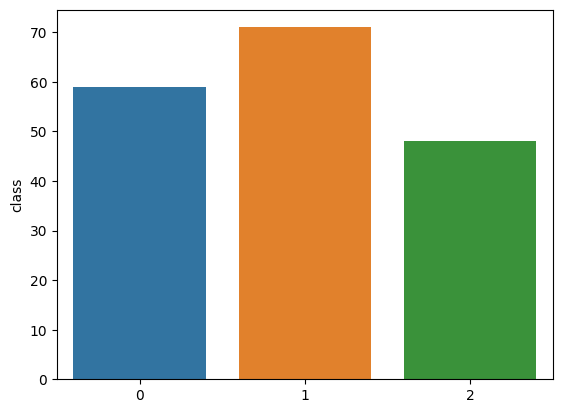

In [17]:
#그래프로 보기
sns.barplot(x = data["class"].value_counts().index, y = data['class'].value_counts())

In [19]:
data['class'].value_counts().index

Int64Index([1, 0, 2], dtype='int64')

<AxesSubplot: ylabel='count'>

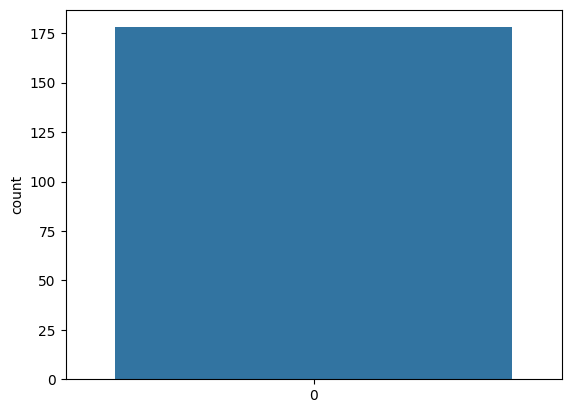

6.5 전처리 : 결측치 처리하기

In [21]:
data.isna()
#true 는 결축치 가 있다. 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
#컬럼별 합과 평균을 구하는 방법
data.sum()

alcohol                           2286.080000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                62.690000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
class                              167.000000
dtype: float64

In [23]:
#결측치 갯수 합
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [25]:
#파이썬 False = 0 / True = 1
data.mean()

alcohol                          12.989091
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.362370
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
class                             0.938202
dtype: float64

In [27]:
data.isna().mean()
# 즉 해당 컬럼에 몇퍼센트나 결측치가 있는지 확인

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

결측치를 처리하는 방법
1. 결측치를 처리하는 결측치 행 제거
2. 결측치 컬럼 제거
3. 결측치 채우기

In [30]:
# 1. 결측치 행 제거하기 : dropna()
# - 결측치 데이터 7개, 그 행 삭제 --> 178개에서 171개 
data.dropna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [31]:
data.dropna().isna().mean()
# 결측치 사라진것 확인

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [32]:
data.dropna(subset=["alcohol"])
# 지정된 변수의 결 측치 행만 제거하기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [35]:
# 2. 결측 변수 제거하기 : drop()
# 변수 자체 제거. 
data.drop(["alcohol","nonflavanoid_phenols"], axis = 1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


In [36]:
# 3. 결측값 채우기 : fillna()
# 일반적으로 평균값이나 중위값으로 채움.
data.fillna(-99) #결측치를 -99로 한번 그냥 채워보자

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [37]:
#평균 값으로 채워보자
data.fillna(data.mean())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [38]:
data.fillna(data.median(), inplace = True)

In [39]:
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

# 데이터 스케일링
- Scikitlearn.preprocessing 모듈 사용
1. 표준화 스케일링 (Standard Scailing): 평균이 0이 되고, 표준편차가 1이 되도록 데이터 분포 
2. 로버스트 스케일링 (Robust Scailing) : 데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용
3. 최소-최대 스케일링 (Min-Max Scailing) : 데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때
4. 정규화 스케일링 : 행 기준 스케일링이 필요할 때 사용, 실제로 거의 사용 하지 않음


In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [44]:
# 스케일러 지정
st_scaler = StandardScaler()

In [45]:
#학습
st_scaler.fit(data)

StandardScaler()

In [46]:
#학습에서 얻은 정보 계산 st_scaled 에
st_scaled = st_scaler.transform(data)

#transform() : 스케일러가 fit()을 통해 학습한 정보를 통해 데이터를 변환, 즉 스케일링 하는 함수

In [48]:
st_scaled
#넘파이식 배열 방식이라 컴퓨터가 읽기 쉬움

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [49]:
pd.DataFrame(st_scaled)
#사람이 읽기 편하게 판다스로

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [50]:
#컬럼명 채워주기
st_scaled = pd.DataFrame(st_scaled, columns = data.columns)

In [51]:
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


# 1. 표준화 스케일링
- 각 변수를 기준으로 하여, 각 데이터 에 해당 변수의 평균만큼 빼주고 ,, 이를 표준편차로 나눈다. 이 수식을 거치면 모든 컬럼이 표준정규분포의 형태를 뜨러게 된다. 
- 위에 fit() 에서 함수로 학습을 시켜줄 때 각 컬럼의 평균과 표준편차가 st_scaler에 기억
- transform()을 적용 하면 그 값들을 이용 하여 위의 수식으로 연산
- 평균이 0이고 분산은 1인 형태 데이터.

In [60]:
from IPython.display import Image


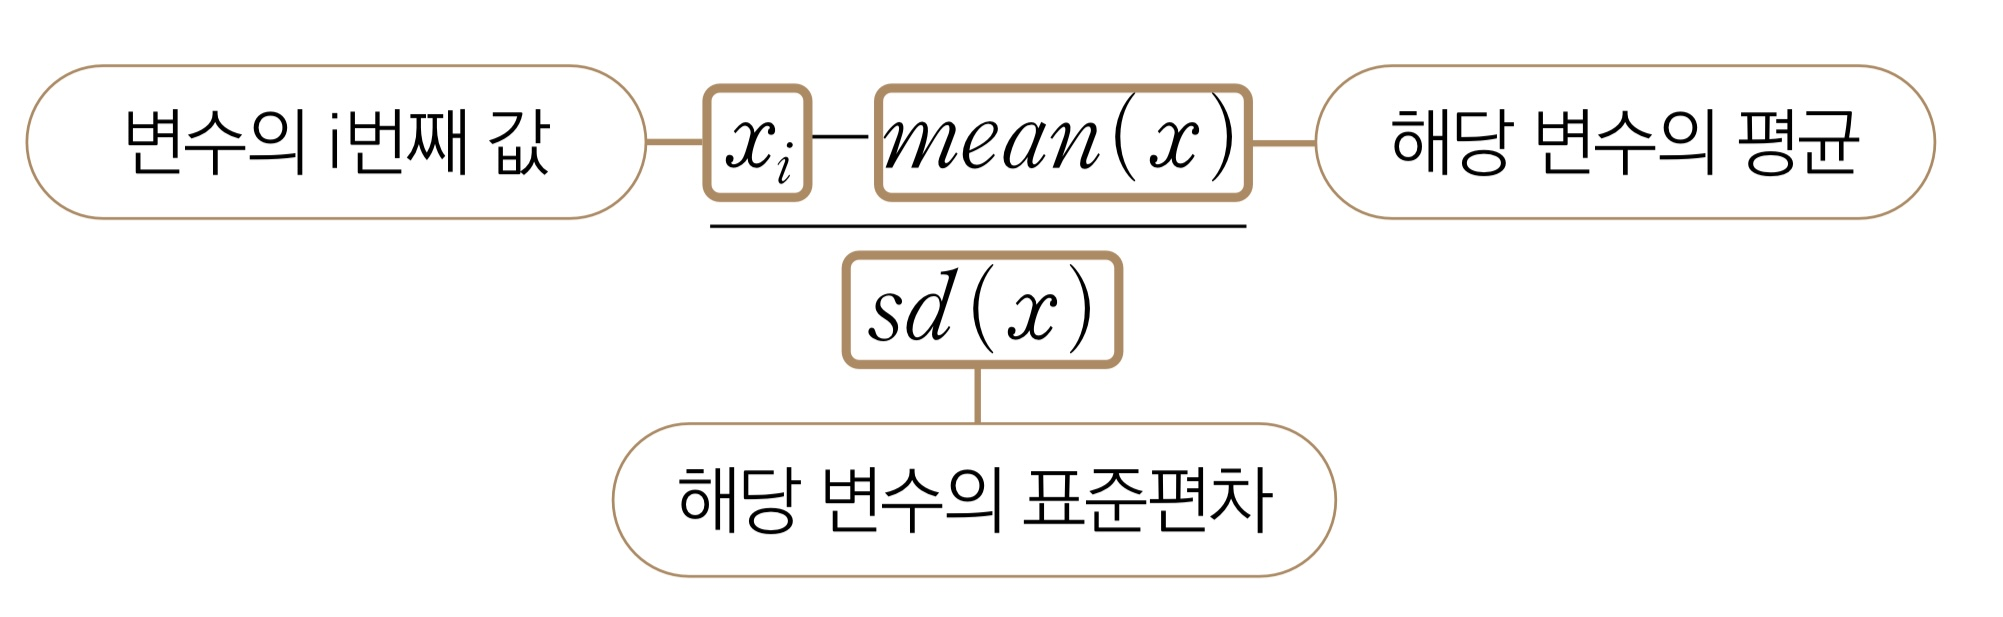

In [62]:
Image('images/5.jpg')

In [53]:
round(st_scaled.describe(),2)
#소숫점 2자리까지 출력
# 데이터가 더 동등한 수준으로 연산

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


# 2. 로버스트 스케일링
- 표준화 스케일링과 달리 평균과 표준편차 대신 사분위 값을 이용
- 때문에 평균값이 0에 가깝지만 0은 아니고, 
- 분산 또한 표준화 스케일링과는 다르게 1로 고정되어 있지 않음

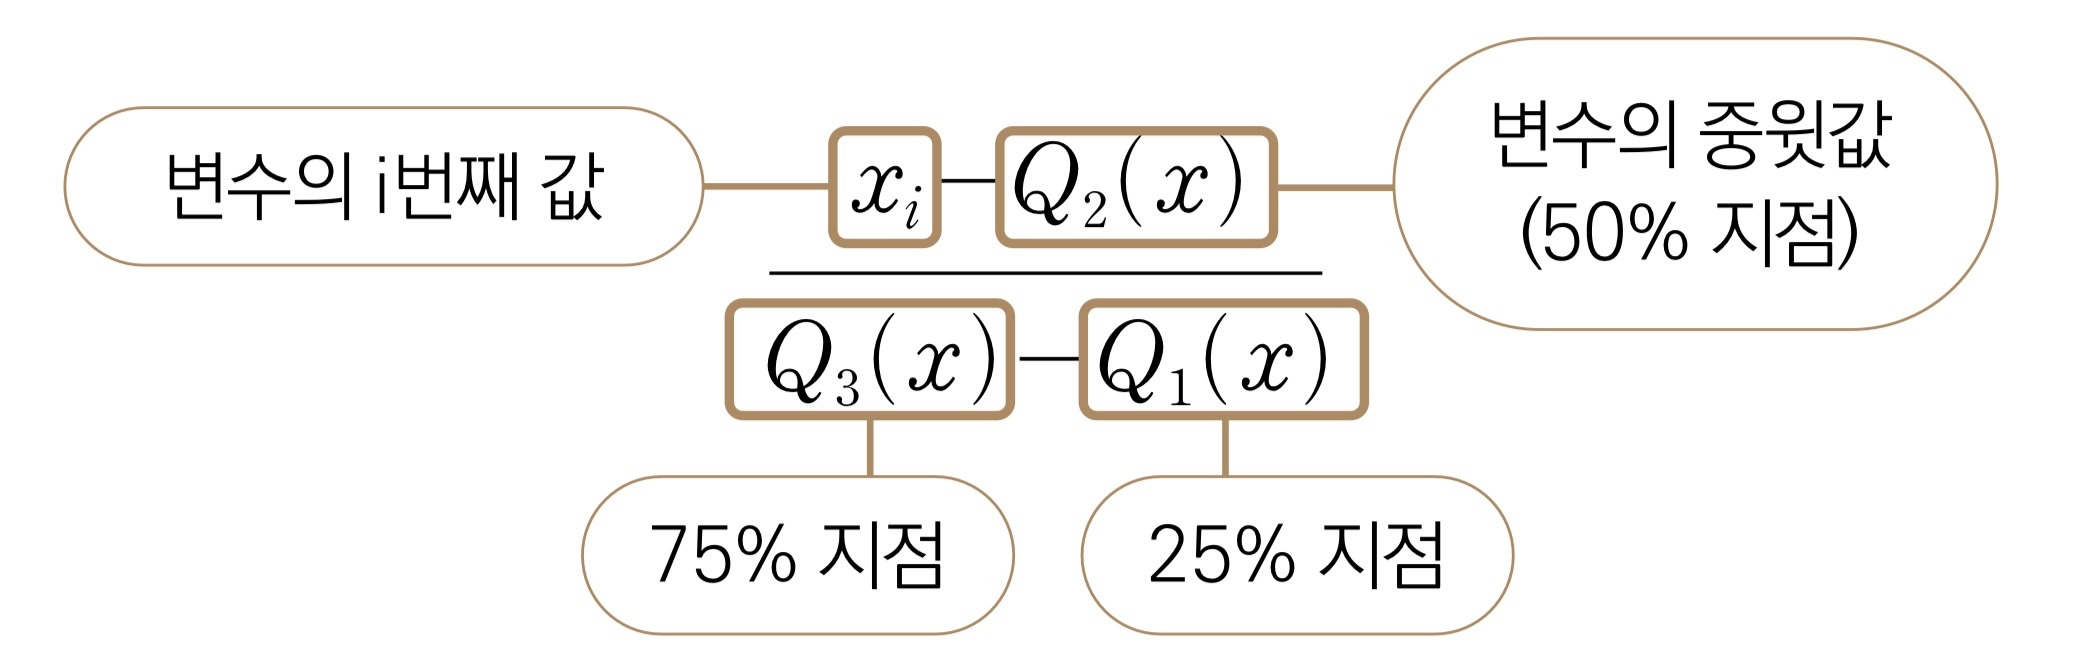

In [63]:
Image('images/6.jpg')

In [56]:

# 로버스트 스케일링에 사용할 객체를 생성
rb_scaler = RobustScaler()

In [57]:
rb_scaled  = rb_scaler.fit_transform(data)
rb_scaled = pd.DataFrame(rb_scaled, columns = data.columns)

In [58]:
round(rb_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


# 3. 최소-최대 스케일링 (MinMaxScaler())
- 최소-최대 스케일링의 특징은 모든 컬럼에서 최댓값이 1 최솟ㄱ밧이 0 인 형태로 변환된다.
- 각 값에서 최솟값을 뺴주고, 최댓값과 최솟 값의 차이만큼으로 나눠주는 스케일링

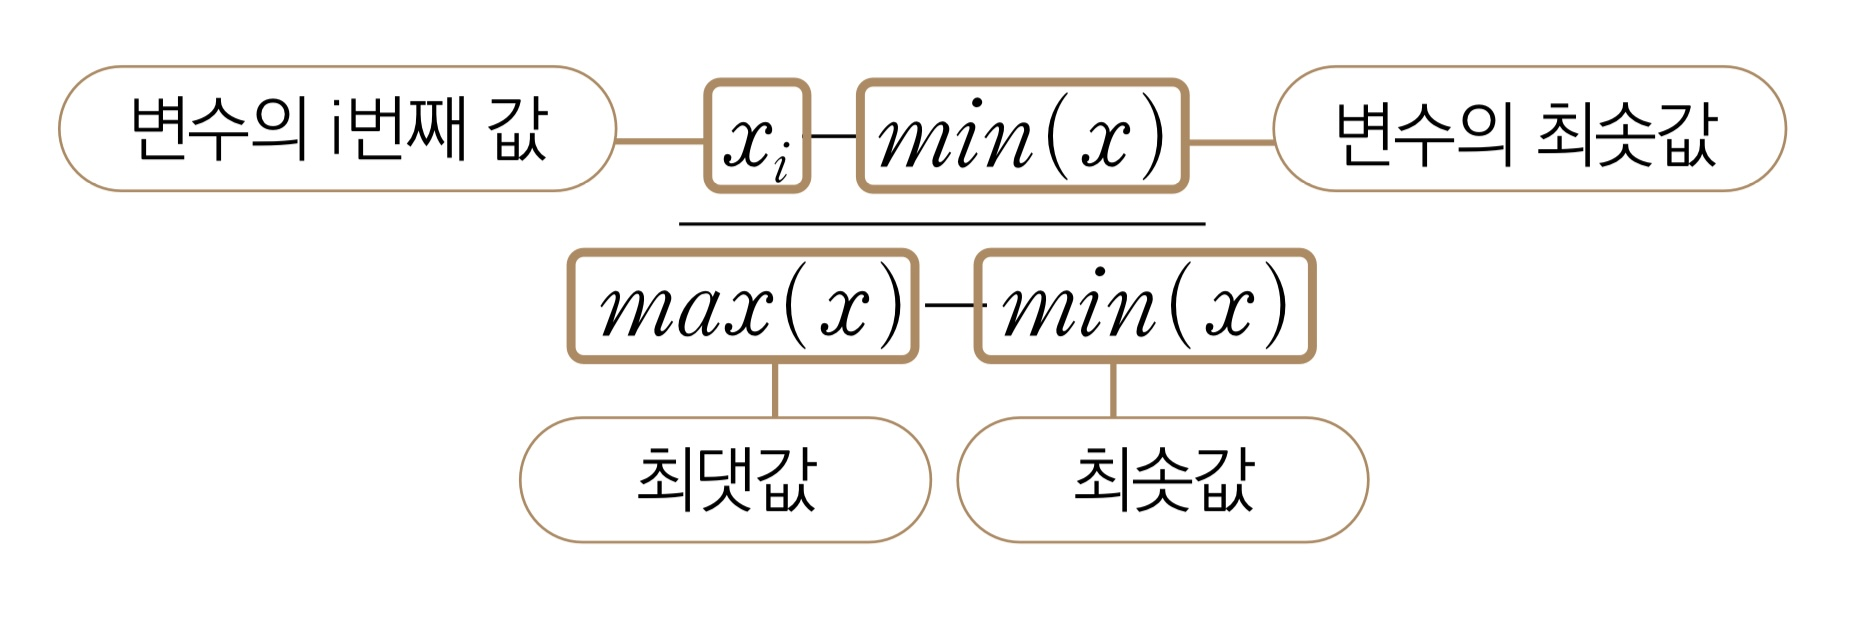

In [64]:
Image('images/7.jpg')

In [65]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
mm_scaled = pd.DataFrame(mm_scaled, columns = data.columns)
round(mm_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# 스케일링 방식 선택하기
1. 로버스트 :데이터에 아웃라이어가 존재 할 때, 아웃라이어의 영향을 받지 않는다. 변화된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타납니다. 
2. 최소-최대 :표준화 스케일링과 마찬가지로 아웃라이어의 영향을 받음. 나머지 두 스케일러와 비교했을때, 데이터의 기존 분포를 가장 있는 그대로 담아 낸다. 데이터의 범위는 0-1이다. 
3. 표준화 : 데이터에 아웃라이어가 존재할 때 아웃라이어의 영향을 받는다. 평균 0, 분산 1 이 되게끔 분포시키기 때문에, 데이터의 기존 분포형태가 사라지고 정규분포를 따르는 결과물을 가지고 온다. 


# 스케일링 시 주의 점.
1. 스케일링 대상에서 종속변수를 제외 해야함.
2. 스케일링 전에 훈련셋과 시험셋을 나누어야함. 
- 시험셋은 진짜 새로운 데이터를 대비한 가상의 새로운 데이터이다. 그래서 훈련셋과 시험셋을 합쳐ㅛ서 평균과 표준편차를 구한다는 행위는 실제로 새로운 데이터를 받았을 떄 기존 데이터와 합쳐서 평균과 표준편차를 구하는 행위와 같다. 


In [66]:
#스케일링 적용해보자
# 데이터 나누기 (한줄에 나누기)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class',axis = 1), data['class'], test_size = 0.2, random_state = 100)

In [67]:
#이렇게 나누어서 해도 됨
# X= data.drop('class', axis = 1)
# y= data['class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [68]:
# 최대- 최소 스케일러 사용
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [69]:
X_train_scaled = mm_scaler.transform(X_train) #학습셋 트랜스폼
X_test_scaled = mm_scaler.transform(X_test) #시험셋 트랜스폼

In [70]:
mm_scaler = MinMaxScaler() #최대 최소 스케일러 객체 생성
X_train_scaled = mm_scaler.fit_transform(X_train) #학습셋 학습 및 트랜스폼
X_test_scaled = mm_scaler.transform(X_test) #학습셋 학습 및 트랜스폼
#fit_transform() 함수는 한방에 처리

6.7 모델링 및 예측/평가하기

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier() #KNN모델 생성
knn.fit(X_train_scaled, y_train) #학습
pred = knn.predict(X_test_scaled) #예측

In [73]:
pred

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8888888888888888

6.8 하이퍼 파라미터 튜닝하기

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

KNN은 분류와 회귀 문제 모두 지원한다. 
- n = 5 : 예측에 참고할 이웃 수
- weights = "uniform" : 예측에 사용되는 갖중치 함수로 기본값인 uniform은 모든 포인트에 동일한 가중치가 부여된다. -'uniform', 'distance'
- metric='minkowski : 거리 측정 기준, 사용가능한 매개변수는 sklearn의 Distance Metric 참조
- n_jobs=None : 실행할 병렬 작업 수

In [75]:
# n = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9166666666666666

In [76]:
# n = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8888888888888888

In [77]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train_scaled,y_train)     
    pred = knn.predict(X_test_scaled)   
    print(accuracy_score(y_test, pred))

0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222


In [78]:
scores = [ ]

In [79]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)    
    scores.append(acc)

In [80]:
scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

<AxesSubplot: >

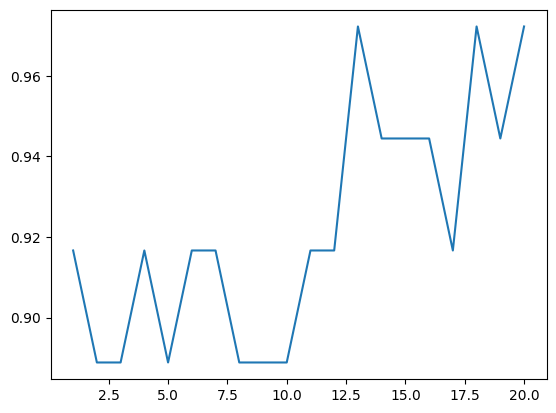

In [81]:
sns.lineplot(x=range(1,21), y=scores)
#선 그래프로 보기, 13 이후에 딱히 개선 되는게 보이지 않음. 그래서 13

In [82]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9722222222222222

## K-최근접 이웃 이해하기
- 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터과 같은 종류로 분류해 내는 기법이다. (예를 들어 인접한 데이터가 모두 파랑이라면 나도 파랑)
- 거리 기반과 스케일링의 의미를 파악해 KNN을 이해해자

1. 거리기반의 의미 파악
2. 스케일링 부분 파악 중요 (스케일링 하냐마냐에 따라 결과값 다름)
3. 동점일 때 처리 
    a. 고려 이웃 수를 홀수로 유지. 
    b. KNN에서는 weights 라는 매개변수가 있는데, 이를 이용하면 동점 일때 그 거리가 더 가까운 쪽으로 결정하도록 설정할 수 있다. 

정리 :
- KNN알고리즘은 예측할 데이터와 기존 데이터의 거리만 계산하면 됨. 딱히 학습은 아님
- 대규모 데이터의 경우 상당한 시간이 걸릴 수도 있다. 

